In [12]:
import geopandas as gpd
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from IPython import display
from subprocess import call

In [79]:
gdf = gpd.read_file('../data/shapefile/DRC-healthzones/zone_stc_puc.shp')
evd_df = pd.read_csv('../data/ebola_drc/drc/data.csv').fillna(0)
## removing first row, corresponding to pre-epidemic cases
evd_df = evd_df[1:]
evd_df = evd_df[evd_df.health_zone!='Ntondo'] ## Currently no cases
evd_df['Date'] = evd_df.report_date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))

evd_df['all_cases'] = evd_df.confirmed_cases + evd_df.probable_cases + evd_df.suspect_cases

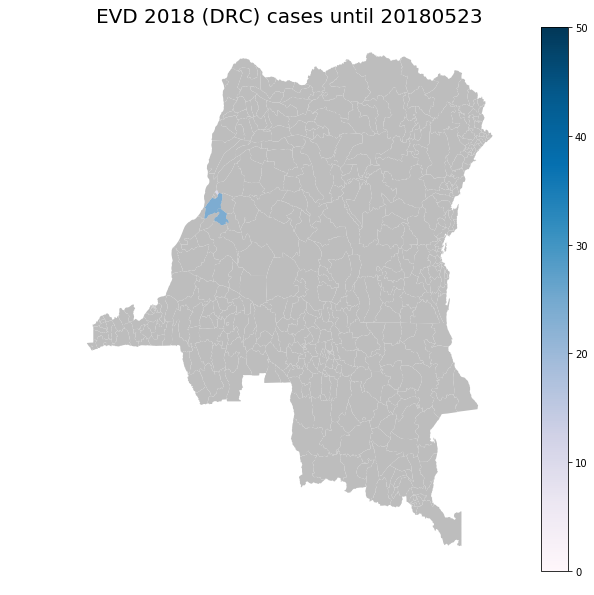

0

In [80]:
count = 0
for rd in evd_df.report_date.unique():
    f = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.axis('off')
    plt.title('EVD 2018 (DRC) cases until {}'.format(rd),fontsize=20)
    gdf.plot(color='#bdbdbd',ax=ax)
    df = evd_df[evd_df.report_date==rd]
    temp_gdf = gdf.merge(df,left_on='NOM_ZS',right_on='health_zone',how='inner')
    temp_gdf.plot(ax=ax,column='all_cases',cmap='PuBu',vmin=0,vmax=50,legend=True)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
    count+=1
    plt.close()
call("convert -delay 200 -loop 1 ../plots/*.png ../plots/animated_DRC.gif".split(' '))

In [81]:
zs_list = evd_df.health_zone.unique()
prov_list = gdf[gdf.NOM_ZS.isin(zs_list)]['PROVINCE'].unique()
print prov_list

[u'Equateur']


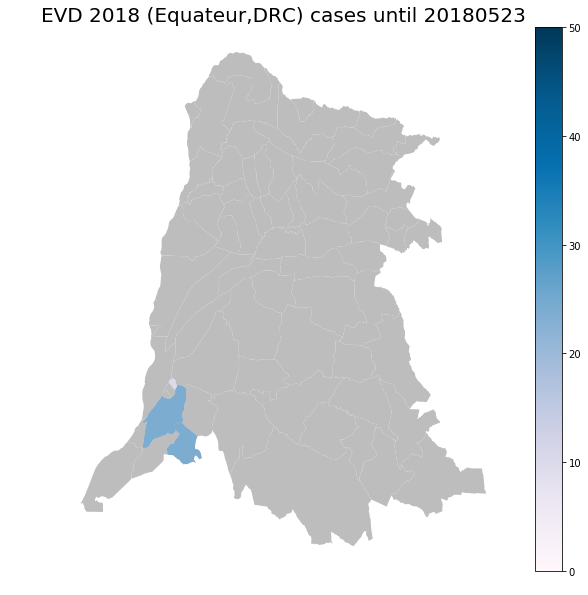

0

In [82]:
count = 0
mask = gdf.PROVINCE.isin(prov_list)
for rd in evd_df.report_date.unique():
    f = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.axis('off')
    plt.title('EVD 2018 (Equateur,DRC) cases until {}'.format(rd),fontsize=20)
    gdf[mask].plot(color='#bdbdbd',ax=ax)
    df = evd_df[evd_df.report_date==rd]
    temp_gdf = gdf.merge(df,left_on='NOM_ZS',right_on='health_zone',how='inner')
    temp_gdf.plot(ax=ax,column='all_cases',cmap='PuBu',vmin=0,vmax=50,legend=True)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
    count+=1
    plt.close()
call("convert -delay 200 -loop 1 ../plots/*.png ../plots/animated_Equateur.gif".split(' '))

### Plotting Cumulative cases epicurves as reported

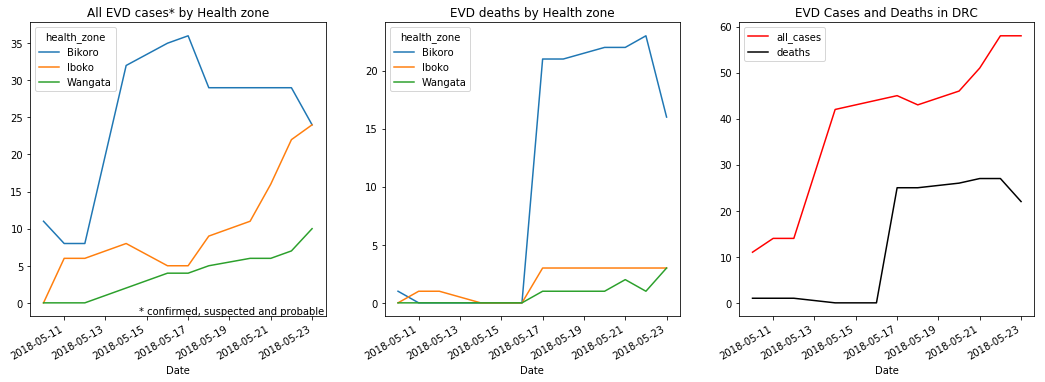

In [88]:
f,axarr = plt.subplots(1,3,figsize=(18,6))
evd_df.pivot(index='Date',columns='health_zone',values='all_cases').fillna(0).plot(ax=axarr[0])
axarr[0].text(0.11, -0.04, '* confirmed, suspected and probable', transform=ax.transAxes)

evd_df.pivot(index='Date',columns='health_zone',values='deaths').fillna(0).plot(ax=axarr[1])

evd_df.groupby(['Date'])[['all_cases','deaths']].sum().plot(ax=axarr[2],color=['red','black'])

axarr[0].set_title('All EVD cases* by Health zone')
axarr[1].set_title('EVD deaths by Health zone')
axarr[2].set_title('EVD Cases and Deaths in DRC')

plt.savefig('../plots/DRC_EVD_epicurves.pdf',dpi=100, bbox_inches='tight')